<a href="https://colab.research.google.com/github/mozhgans/courses/blob/main/Course_Udemy_Machine_Learning%2C_Data_Science_and_Deep_Learning_with_Python1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Covariance and correlation:

Covariance measures how two variables vary in tandem from their means.

For example, let's say we work for an e-commerce company, and they are interested in finding a correlation between page speed (how fast each web page renders for a customer) and how much a customer spends.

numpy offers covariance methods, but we'll do it the "hard way" to show what happens under the hood. Basically we treat each variable as a vector of deviations from the mean, and compute the "dot product" of both vectors. Geometrically this can be thought of as the angle between the two vectors in a high-dimensional space, but you can just think of it as a measure of similarity between the two variables.

First, let's just make page speed and purchase amount totally random and independent of each other; a very small covariance will result as there is no real correlation:

0.018317430914073382

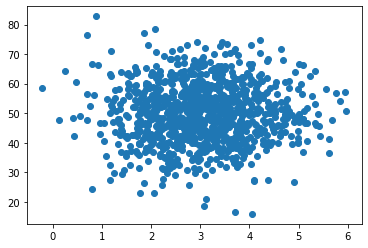

In [4]:
%matplotlib inline
import numpy as np
from pylab import *
def de_mean(x):
    xmean = mean(x)
    return [xi - xmean for xi in x]

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)


pageSpeeds = np.random.normal(3,1,1000)
purchaseAmount = np.random.normal(50,10,1000)
scatter(pageSpeeds, purchaseAmount)
covariance(pageSpeeds, purchaseAmount)

Now we'll make our fabricated purchase amounts an actual function of page speed, making a very real correlation. The negative value indicates an inverse relationship; pages that render in less time result in more money spent:

0.14002499347068825

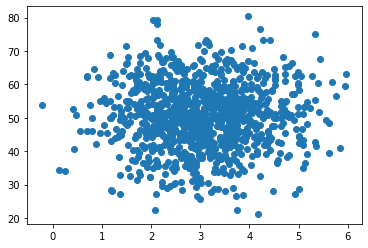

In [5]:
purchaseAmount = np.random.normal(50, 10, 1000)
scatter(pageSpeeds, purchaseAmount)
covariance(pageSpeeds, purchaseAmount)

But, what does this value mean? Covariance is sensitive to the units used in the variables, which makes it difficult to interpret. Correlation normalizes everything by their standard deviations, giving you an easier to understand value that ranges from -1 (for a perfect inverse correlation) to 1 (for a perfect positive correlation):

In [6]:
def correlation(x, y):
    stddevx = x.std()
    stddevy = y.std()
    return covariance(x,y) / stddevx / stddevy  #In real life you'd check for divide by zero here

correlation(pageSpeeds, purchaseAmount)

0.014140746913590557

numpy can do all this for you with numpy.corrcoef. It returns a matrix of the correlation coefficients between every combination of the arrays passed in:

In [7]:
np.corrcoef(pageSpeeds, purchaseAmount)

array([[1.        , 0.01412661],
       [0.01412661, 1.        ]])

(It doesn't match exactly just due to the math precision available on a computer.)

We can force a perfect correlation by fabricating a totally linear relationship (again, it's not exactly -1 just due to precision errors, but it's close enough to tell us there's a really good correlation here):

-1.0010010010010009

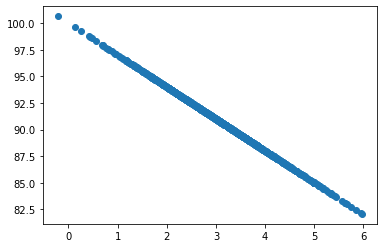

In [8]:
purchaseAmount = 100 - pageSpeeds * 3

scatter(pageSpeeds, purchaseAmount)

correlation (pageSpeeds, purchaseAmount)

Remember, correlation does not imply causality!

numpy also has a numpy.cov function that can compute Covariance for you. 

Conditional Probability:

Below is some code to create some fake data on how much stuff people purchase given their age range.

It generates 100,000 random "people" and randomly assigns them as being in their 20's, 30's, 40's, 50's, 60's, or 70's.

It then assigns a lower probability for young people to buy stuff.

In the end, we have two Python dictionaries:

"totals" contains the total number of people in each age group. "purchases" contains the total number of things purchased by people in each age group. The grand total of purchases is in totalPurchases, and we know the total number of people is 100,000.

Let's run it and have a look:

In [10]:
from numpy import random
random.seed(0)

totals = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
purchases = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
totalPurchases = 0
for _ in range(100000):
    ageDecade = random.choice([20, 30, 40, 50, 60, 70])
    purchaseProbability = float(ageDecade) / 100.0
    totals[ageDecade] += 1
    if (random.random() < purchaseProbability):
        totalPurchases += 1
        purchases[ageDecade] += 1

In [11]:
totals

{20: 16576, 30: 16619, 40: 16632, 50: 16805, 60: 16664, 70: 16704}

In [12]:
purchases

{20: 3392, 30: 4974, 40: 6670, 50: 8319, 60: 9944, 70: 11713}

In [14]:
totalPurchases

45012

Let's play with conditional probability.

First let's compute P(E|F), where E is "purchase" and F is "you're in your 30's". The probability of someone in their 30's buying something is just the percentage of how many 30-year-olds bought something:

In [15]:
PEF = float(purchases[30]) / float(totals[30])
print('P(purchase | 30s): ' + str(PEF))

P(purchase | 30s): 0.29929598652145134


P(F) is just the probability of being 30 in this data set:

In [16]:
PF = float(totals[30]) / 100000.0
print("P(30's): " +  str(PF))

P(30's): 0.16619


And P(E) is the overall probability of buying something, regardless of your age:

In [20]:
PE = float(totalPurchases) / 100000.0
print("P(Purchase):" + str(PE))

P(Purchase):0.45012


If E and F were independent, then we would expect P(E | F) to be about the same as P(E). But they're not; P(E) is 0.45, and P(E|F) is 0.3. So, that tells us that E and F are dependent (which we know they are in this example.)

P(E,F) is different from P(E|F). P(E,F) would be the probability of both being in your 30's and buying something, out of the total population - not just the population of people in their 30's:

In [21]:
print("P(30's, Purchase)" + str(float(purchases[30]) / 100000.0))

P(30's, Purchase)0.04974


Let's also compute the product of P(E) and P(F), P(E)P(F):

In [22]:
print("P(30's)P(Purchase)" + str(PE * PF))

P(30's)P(Purchase)0.07480544280000001


Something you may learn in stats is that P(E,F) = P(E)P(F), but this assumes E and F are independent. We've found here that P(E,F) is about 0.05, while P(E)P(F) is about 0.075. So when E and F are dependent - and we have a conditional probability going on - we can't just say that P(E,F) = P(E)P(F).

We can also check that P(E|F) = P(E,F)/P(F), which is the relationship we showed in the slides - and sure enough, it is:

In [23]:
print((purchases[30] / 100000.0) / PF)

0.29929598652145134


Modify the code above such that the purchase probability does NOT vary with age, making E and F actually independent.

Then, confirm that P(E|F) is about the same as P(E), showing that the conditional probability of purchase for a given age is not any different than the a-priori probability of purchase regardless of age.

First we'll modify the code to have some fixed purchase probability regardless of age, say 40%:

In [25]:
from numpy import random
random.seed(0)

totals = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
purchases = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
totalPurchases = 0
for _ in range(100000):
    ageDecade = random.choice([20, 30, 40, 50, 60, 70])
    purchaseProbability = 0.4
    totals[ageDecade] += 1
    if (random.random() < purchaseProbability):
        totalPurchases += 1
        purchases[ageDecade] += 1

Next we will compute P(E|F) for some age group, let's pick 30 year olds again:

In [26]:
PEF = float(purchases[30]) / float(totals[30])
print("P(purchase | 30s): " + str(PEF))


P(purchase | 30s): 0.3987604549010169


now, we compute P(E)

In [27]:
PE = float(totalPurchases) / 100000.0
print("P(Purchase):" + str(PE))

P(Purchase):0.4003


P(E|F) is pretty darn close to P(E), so we can say that E and F are likely indepedent variables.